# import required Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## display all columns of the dataframe
pd.pandas.set_option("display.max_columns",None)

In [3]:
df = pd.read_excel("HousePricePrediction.xlsx")

In [1]:
%pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [5]:
df.shape

(2919, 13)

In [6]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().sum(),4), "missing values")

MSZoning 4 missing values
Exterior1st 1 missing values
BsmtFinSF2 1 missing values
TotalBsmtSF 1 missing values
SalePrice 1459 missing values


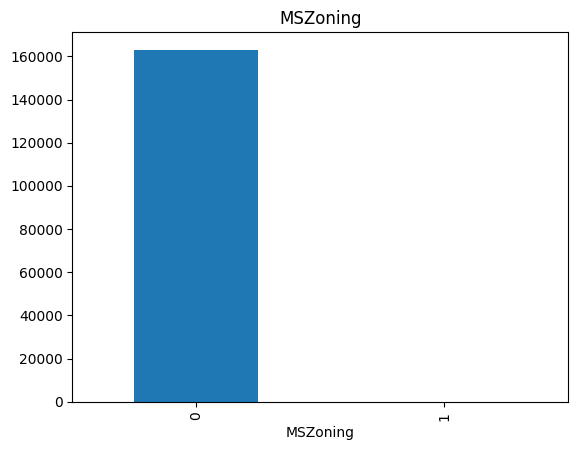

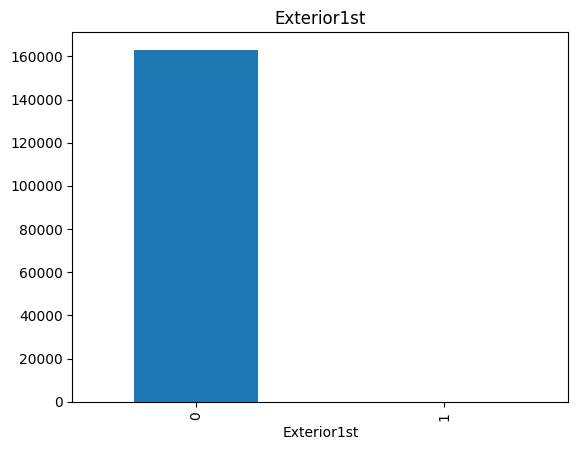

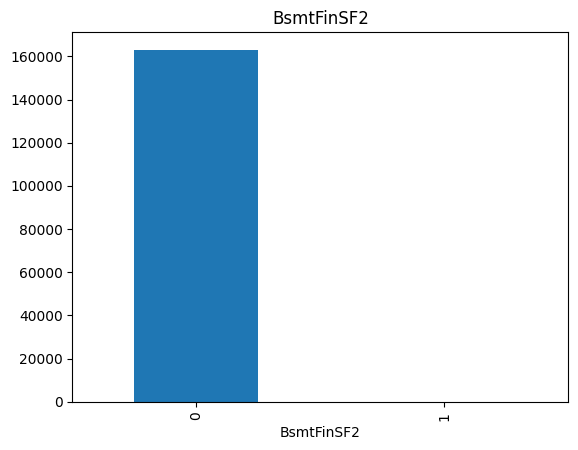

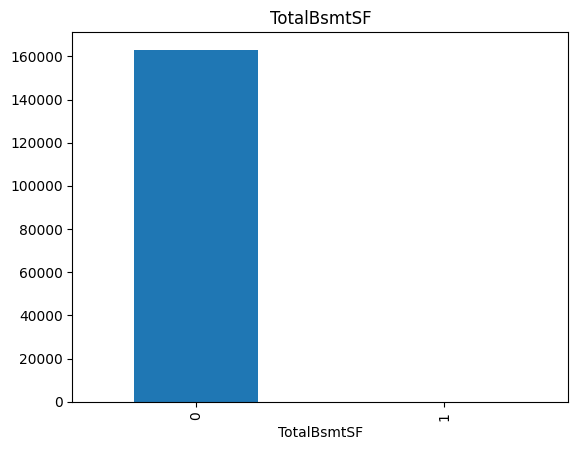

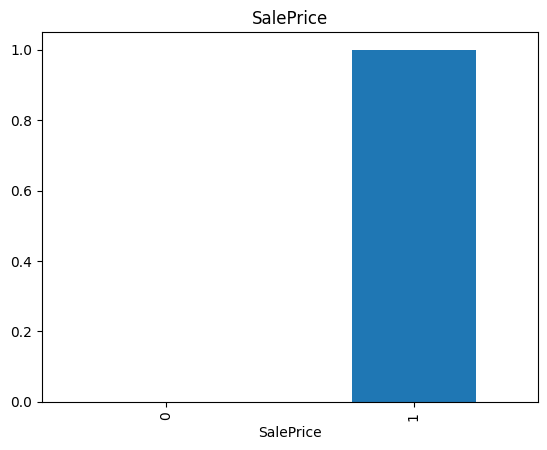

In [7]:
for feature in features_with_na:
    data = df.copy()
    # let's make a variable that indicates 1 if the observation was missing or 0 otherwise
    data[feature]=np.where(data[feature].isnull(),1,0)
    
    #let's calculate the mean saleprice where the information is missing or present
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.show()

In [8]:
#simpleimputer: module used to fill in missing values  in datasets with a specific strategy(eg, mean,median,mode)

from sklearn.impute import SimpleImputer   
imputer =SimpleImputer(strategy="mean")  #missing values should be replaced with the mean of the column
imputer.fit(df[["SalePrice"]])  #calculate the replacement value based on saleprice column.it doesn't modify the data yet

SimpleImputer()

In [9]:
imputer.statistics_

array([180921.19589041])

In [10]:
df["SalePrice"]=imputer.transform(df[["SalePrice"]])

In [11]:
df.isnull().sum()

Id              0
MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [12]:
df=df.fillna(0)

In [13]:
df.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [14]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.565262,1051.417266,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.179104,441.120498,56174.332503
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,163000.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.000000,180921.195890
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


<Axes: ylabel='LotArea'>

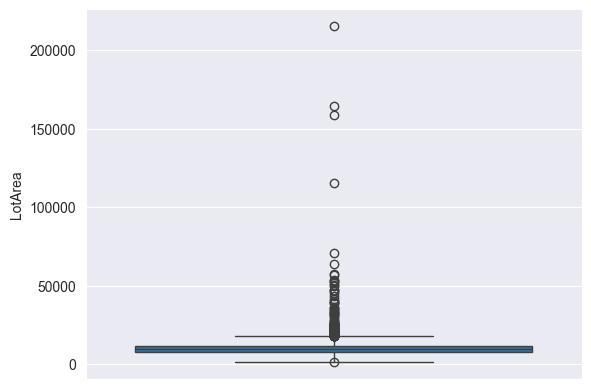

In [15]:
sns.set_style("darkgrid")
sns.boxplot(df,y="LotArea")   # it ha more outliers

In [16]:
# to handle outliers use IQR(inter quartile range method) 75%-25%
Q1 = np.percentile(df["LotArea"], 25, interpolation="midpoint")
Q3 = np.percentile(df["LotArea"], 75, interpolation="midpoint")



In [17]:
IQR = Q3 - Q1   #CALCULATE MIDDLE 50% OF THE DATA

In [18]:
lowerbound = Q1 - 1.5 * IQR
upperbound = Q1 + 1.5 * IQR

In [19]:
df = df[(df.LotArea < upperbound) & (df.LotArea > lowerbound)]

In [20]:
df.shape

(2550, 13)

# numerical variables

In [21]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature] .dtype!="O"]
print("Number of numerical variables:", len(numerical_features))

#visualize the numerical variables
df[numerical_features].head()

Number of numerical variables: 9


,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
6,6,20,10084,5,2004,2005,0.0,1686.0,307000.0


In [22]:
# list of numerical variables
cat_features = [feature for feature in df.columns if df[feature] .dtype=="O"]
print("Number of categarical values:", len(cat_features))

#visualize the numerical variables
df[cat_features].head()

Number of categarical values: 4


,MSZoning,LotConfig,BldgType,Exterior1st
0,RL,Inside,1Fam,VinylSd
1,RL,FR2,1Fam,MetalSd
2,RL,Inside,1Fam,VinylSd
3,RL,Corner,1Fam,Wd Sdng
6,RL,Inside,1Fam,VinylSd


In [23]:
#convert object to number

from sklearn.preprocessing import OneHotEncoder   
encoder = OneHotEncoder( handle_unknown="ignore")   #ignore unknown categories during transformation
encoder.fit(df[cat_features])  #learn all unique category

OneHotEncoder(handle_unknown='ignore')

In [24]:
encoded_col = encoder.get_feature_names_out(cat_features)   #generate names of the new column

In [25]:
encoded_col

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'Exterior1st_AsbShng',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'], dtype=object)